# Part 3 - CNN

In [189]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


batch1 = pd.read_pickle("train_batch1.pkl")
batch2 = pd.read_pickle("train_batch2.pkl")
batch3 = pd.read_pickle("train_batch3.pkl")
batch4 = pd.read_pickle("train_batch4.pkl")
batch5 = pd.read_pickle("train_batch5.pkl")
test_batch = pd.read_pickle("test_batch1.pkl")

total__train_data = pd.concat([batch1, batch2, batch3, batch4, batch5], ignore_index=True)
X_train = total__train_data.iloc[:, :-1].values.reshape(-1,32,32)
y_train = total__train_data['label']


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

meta_file = r"C:\Users\chiam\Documents\IT3312 - AITECH\Assignment\cifar-10-batches-py\batches.meta"
meta_data = unpickle(meta_file)

label_names = meta_data['label_names']

print(type(meta_data))
print("Label Names:", label_names)

X_test = test_batch.iloc[:, :-1].values.reshape(-1,32,32)
y_test = test_batch['label']


X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print("x_test shape:", X_test.shape)
print(X_test.shape[0], "test samples")

<class 'dict'>
Label Names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
x_train shape: (50000, 32, 32, 1)
50000 train samples
x_test shape: (10000, 32, 32, 1)
10000 test samples


## Preprocess the data

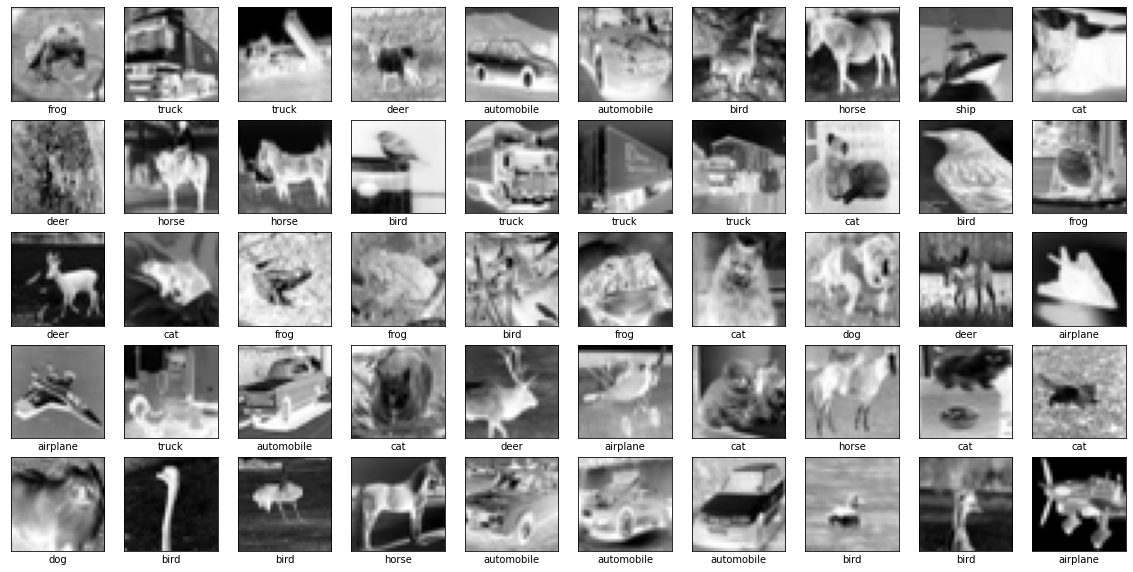

In [192]:
plt.figure(figsize=(20,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(label_names[y_train[i]])
plt.show()

In [19]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)
print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print("x_test shape:", X_test.shape)
print(X_test.shape[0], "test samples")

x_train shape: (48000, 32, 32, 1)
48000 train samples
x_test shape: (12000, 32, 32, 1)
12000 test samples


In [20]:
y_train[0:10]

array([4, 5, 1, 7, 7, 7, 4, 9, 6, 9], dtype=uint8)

# Build first CNN model

In [22]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
%matplotlib inline

num_classes = 10
input_shape = (32, 32, 1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)              

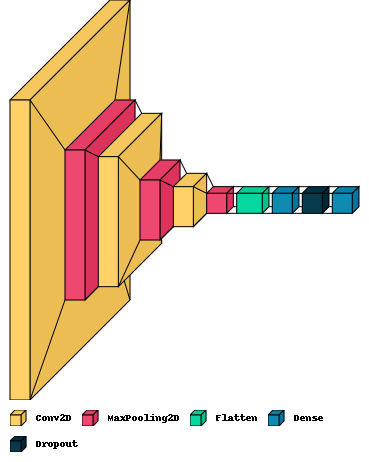

In [23]:
import visualkeras
visualkeras.layered_view(model, scale_xy=10, legend=True)

In [24]:
batch_size = 32
epochs = 20

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/20
1200/1200 [==============================] - 26s 22ms/step - loss: 1.8958 - accuracy: 0.2997 - val_loss: 1.5740 - val_accuracy: 0.4439
Epoch 2/20
1200/1200 [==============================] - 25s 21ms/step - loss: 1.5694 - accuracy: 0.4396 - val_loss: 1.3491 - val_accuracy: 0.5301
Epoch 3/20
1200/1200 [==============================] - 28s 23ms/step - loss: 1.4144 - accuracy: 0.5030 - val_loss: 1.2647 - val_accuracy: 0.5599
Epoch 4/20
1200/1200 [==============================] - 27s 22ms/step - loss: 1.3148 - accuracy: 0.5383 - val_loss: 1.1629 - val_accuracy: 0.5915
Epoch 5/20
1200/1200 [==============================] - 27s 23ms/step - loss: 1.2414 - accuracy: 0.5653 - val_loss: 1.1932 - val_accuracy: 0.5863
Epoch 6/20
1200/1200 [==============================] - 24s 20ms/step - loss: 1.1813 - accuracy: 0.5884 - val_loss: 1.0964 - val_accuracy: 0.6203
Epoch 7/20
1200/1200 [==============================] - 24s 20ms/step - loss: 1.1332 - accuracy: 0.6051 - val_loss: 1.0866 -

In [26]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.9881120324134827
Test accuracy: 0.6645833253860474


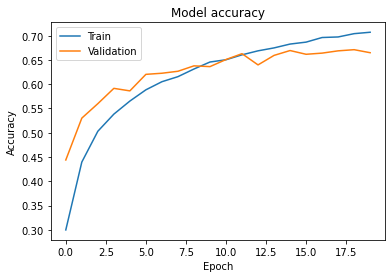

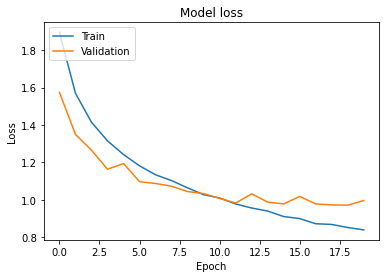

In [27]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [28]:
evaluation = model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

375/375 [==============================] - 2s 5ms/step - loss: 0.9881 - accuracy: 0.6646
Test Accuracy : 66.46%


In [29]:
y_test_pred = np.argmax(model.predict(X_test), axis=-1)

from sklearn import metrics
print(f"Classification report for classifier {model}:\n"
      f"{metrics.classification_report(y_test, y_test_pred)}\n")

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000025B807FA130>:
              precision    recall  f1-score   support

           0       0.68      0.71      0.69      1250
           1       0.77      0.87      0.82      1157
           2       0.49      0.57      0.53      1184
           3       0.47      0.40      0.43      1142
           4       0.71      0.51      0.59      1229
           5       0.63      0.57      0.60      1239
           6       0.67      0.74      0.70      1204
           7       0.67      0.75      0.71      1193
           8       0.76      0.80      0.78      1241
           9       0.79      0.73      0.76      1161

    accuracy                           0.66     12000
   macro avg       0.66      0.66      0.66     12000
weighted avg       0.66      0.66      0.66     12000




In [30]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)

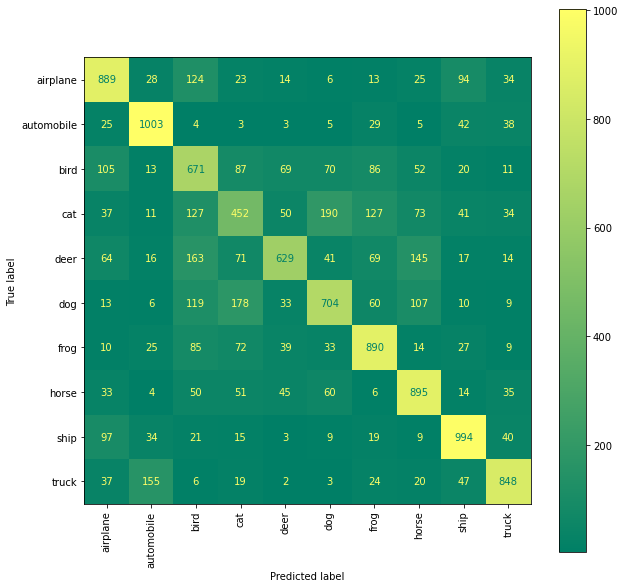

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=label_names)

fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

## Build Second CNN Model

I removed one layer and increase the dense layer.

In [197]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
%matplotlib inline

num_classes = 10
input_shape = (32, 32, 1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_94 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)             

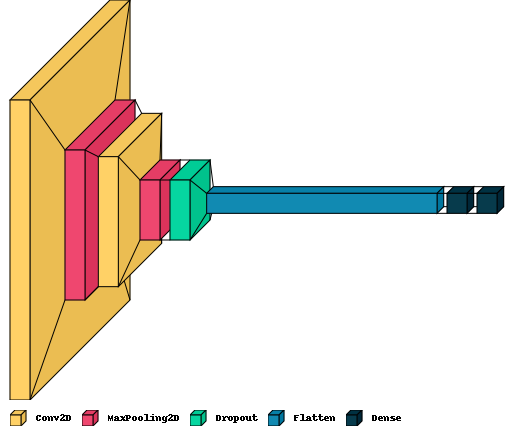

In [198]:
import visualkeras
visualkeras.layered_view(model, scale_xy=10, legend=True)

In [199]:
batch_size = 32
epochs = 20

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [200]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/20
1250/1250 [==============================] - 28s 22ms/step - loss: 1.6801 - accuracy: 0.4015 - val_loss: 1.4312 - val_accuracy: 0.5003
Epoch 2/20
1250/1250 [==============================] - 29s 23ms/step - loss: 1.3691 - accuracy: 0.5234 - val_loss: 1.2545 - val_accuracy: 0.5699
Epoch 3/20
1250/1250 [==============================] - 28s 23ms/step - loss: 1.2435 - accuracy: 0.5642 - val_loss: 1.1131 - val_accuracy: 0.6178
Epoch 4/20
1250/1250 [==============================] - 25s 20ms/step - loss: 1.1618 - accuracy: 0.5949 - val_loss: 1.0808 - val_accuracy: 0.6276
Epoch 5/20
1250/1250 [==============================] - 28s 23ms/step - loss: 1.0939 - accuracy: 0.6210 - val_loss: 1.0321 - val_accuracy: 0.6395
Epoch 6/20
1250/1250 [==============================] - 32s 25ms/step - loss: 1.0389 - accuracy: 0.6381 - val_loss: 0.9743 - val_accuracy: 0.6652
Epoch 7/20
1250/1250 [==============================] - 31s 25ms/step - loss: 0.9876 - accuracy: 0.6560 - val_loss: 0.9497 -

The accuracy improved from 66% to 70% and the loss has decresed from 0.99 to 0.87.

In [36]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.8751806616783142
Test accuracy: 0.7087500095367432


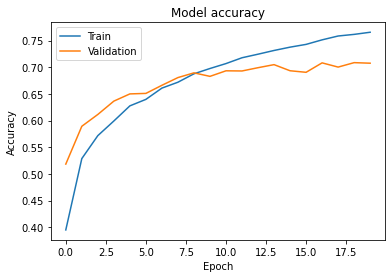

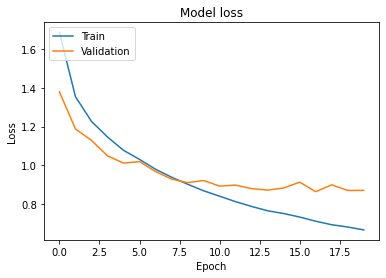

In [37]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [38]:
y_test_pred = np.argmax(model.predict(X_test), axis=-1)

from sklearn import metrics
print(f"Classification report for classifier {model}:\n"
      f"{metrics.classification_report(y_test, y_test_pred)}\n")

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000025B8074DA00>:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1250
           1       0.85      0.85      0.85      1157
           2       0.66      0.54      0.59      1184
           3       0.47      0.54      0.51      1142
           4       0.66      0.67      0.66      1229
           5       0.61      0.61      0.61      1239
           6       0.79      0.73      0.76      1204
           7       0.77      0.75      0.76      1193
           8       0.74      0.85      0.79      1241
           9       0.80      0.81      0.81      1161

    accuracy                           0.71     12000
   macro avg       0.71      0.71      0.71     12000
weighted avg       0.71      0.71      0.71     12000




In [39]:
evaluation = model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

375/375 [==============================] - 2s 5ms/step - loss: 0.8752 - accuracy: 0.7088
Test Accuracy : 70.88%


In [40]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

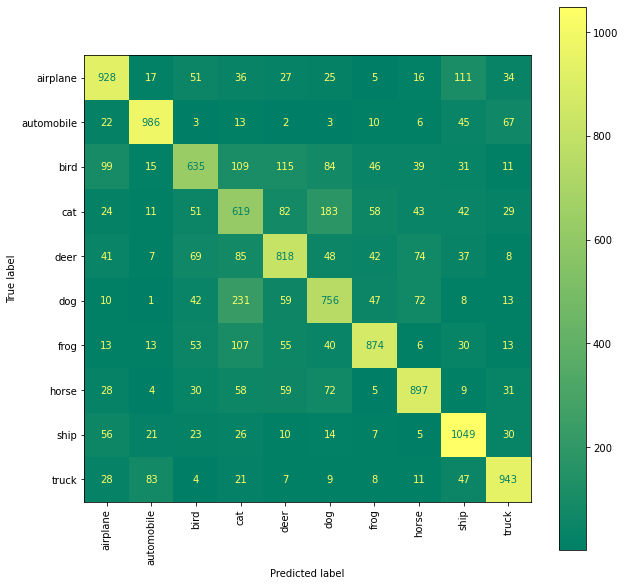

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=label_names)

fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [205]:
predictions = model.predict(X_test)

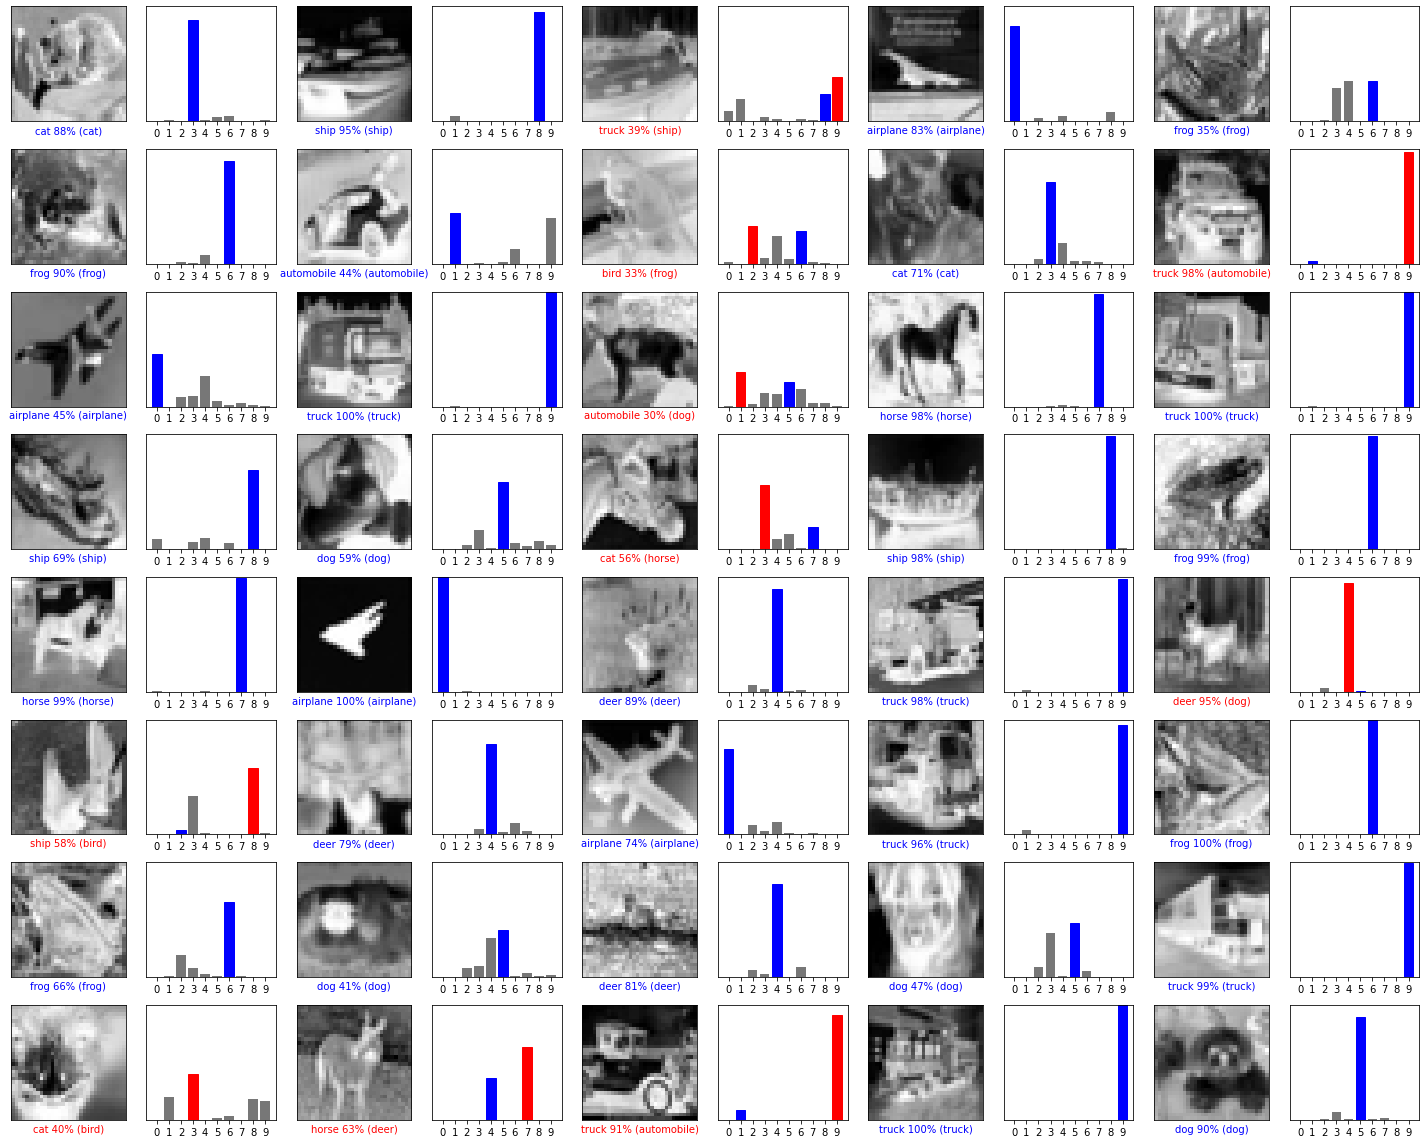

In [206]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{label_names[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({label_names[int(true_label)]})", 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

## Build 3rd CNN Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


model=Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [ ]:
pip install visualkeras

Note: you may need to restart the kernel to use updated packages.


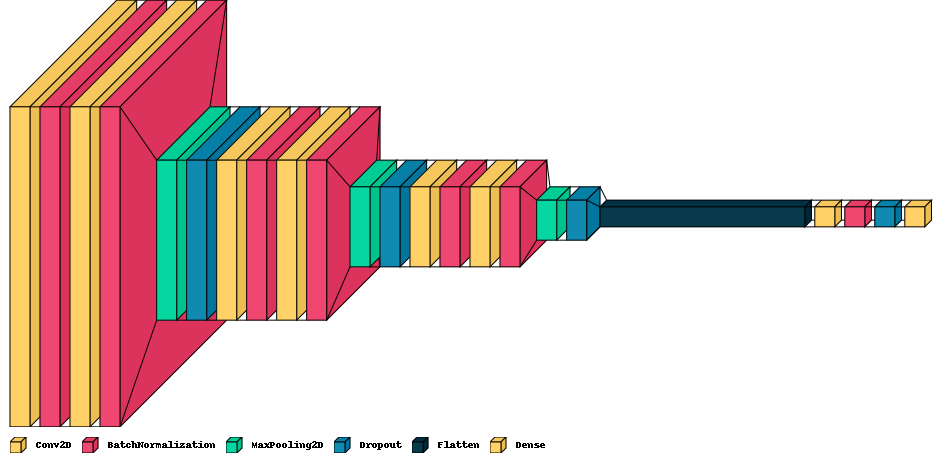

In [ ]:
import visualkeras
visualkeras.layered_view(model, scale_xy=10, legend=True)

In [ ]:
batch_size = 64
epochs = 30

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Fit the model to training data

In [ ]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/30
625/625 [==============================] - 226s 362ms/step - loss: 1.7195 - accuracy: 0.4127 - val_loss: 1.4402 - val_accuracy: 0.4984
Epoch 2/30
625/625 [==============================] - 222s 355ms/step - loss: 1.1619 - accuracy: 0.5893 - val_loss: 0.9793 - val_accuracy: 0.6624
Epoch 3/30
625/625 [==============================] - 220s 351ms/step - loss: 0.9877 - accuracy: 0.6531 - val_loss: 0.8119 - val_accuracy: 0.7112
Epoch 4/30
625/625 [==============================] - 216s 346ms/step - loss: 0.8861 - accuracy: 0.6910 - val_loss: 0.8246 - val_accuracy: 0.7108
Epoch 5/30
625/625 [==============================] - 214s 342ms/step - loss: 0.8081 - accuracy: 0.7181 - val_loss: 0.7390 - val_accuracy: 0.7456
Epoch 6/30
625/625 [==============================] - 214s 342ms/step - loss: 0.7484 - accuracy: 0.7359 - val_loss: 0.6545 - val_accuracy: 0.7736
Epoch 7/30
625/625 [==============================] - 212s 340ms/step - loss: 0.6923 - accuracy: 0.7588 - val_loss: 0.6364 -

## Evaluate Model Accuracy

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.5232115387916565
Test accuracy: 0.8367999792098999


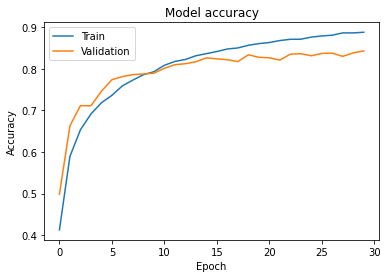

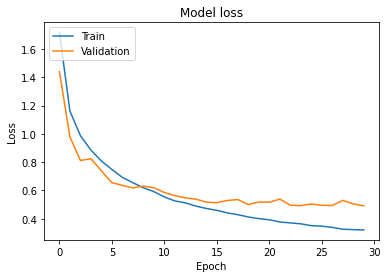

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Classification Report

In [ ]:
y_test_pred = np.argmax(model.predict(X_test), axis=-1)

from sklearn import metrics
print(f"Classification report for classifier {model}:\n"
      f"{metrics.classification_report(y_test, y_test_pred)}\n")

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002110D78DBE0>:
              precision    recall  f1-score   support

           0       0.80      0.90      0.84      1000
           1       0.91      0.96      0.93      1000
           2       0.76      0.74      0.75      1000
           3       0.71      0.69      0.70      1000
           4       0.81      0.81      0.81      1000
           5       0.76      0.78      0.77      1000
           6       0.85      0.89      0.87      1000
           7       0.91      0.85      0.88      1000
           8       0.95      0.87      0.91      1000
           9       0.94      0.89      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000




In [ ]:
evaluation = model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 7s 22ms/step - loss: 0.5232 - accuracy: 0.8368
Test Accuracy : 83.68%


## Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

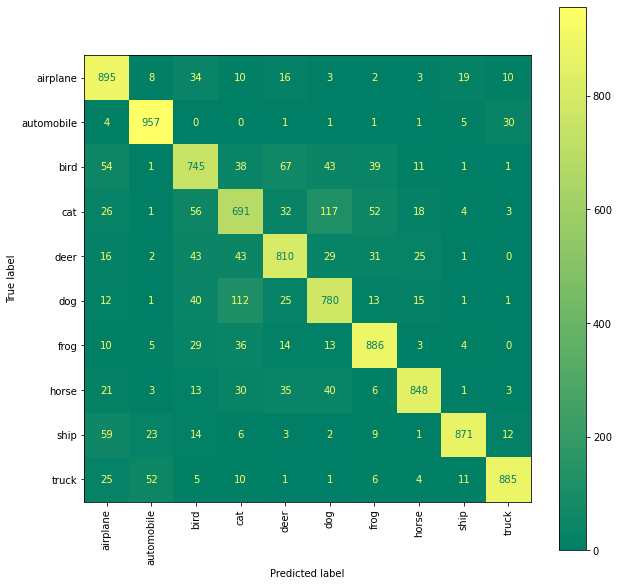

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=label_names)

fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

## Predictions Using Test Data

In [ ]:
predictions = model.predict(X_test)

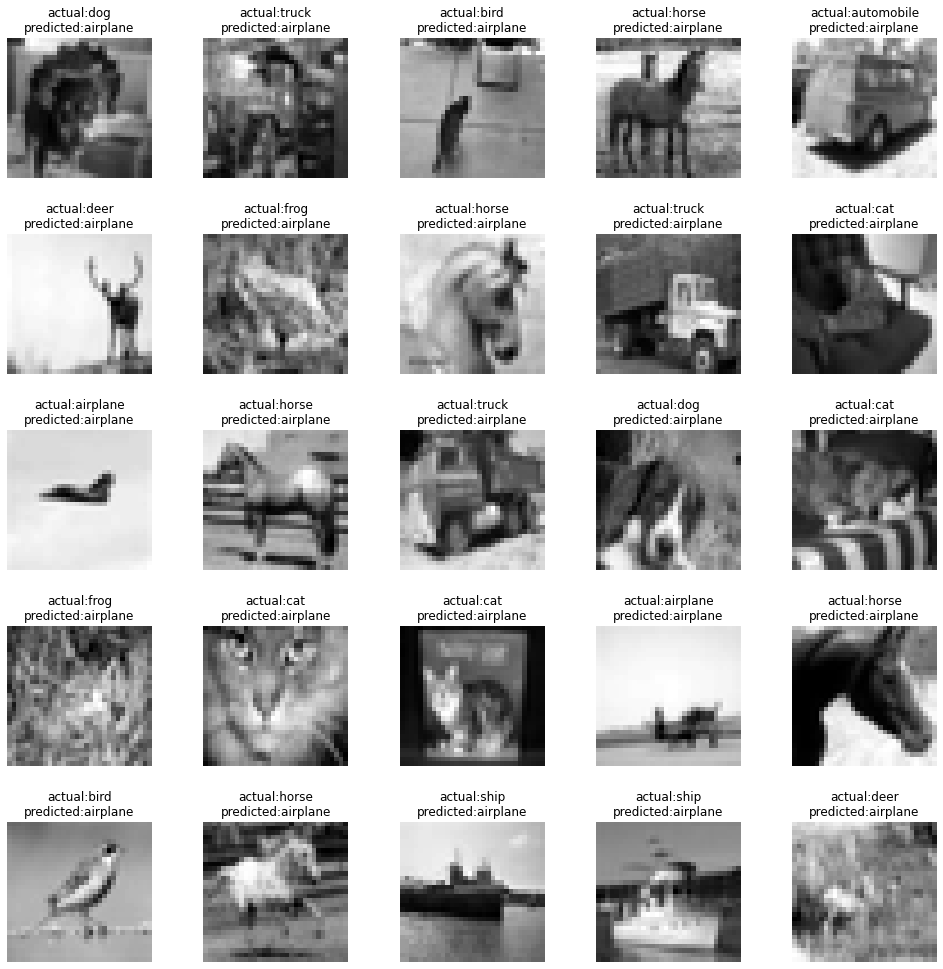

In [ ]:
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(X_test) # get the length of the train dataset

y_test = y_test.astype(int)
predictions = predictions.astype(int)

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index    
    axes[i].imshow(X_test[index,1:], cmap="gray")
    label_index = int(y_pred[index])
    axes[i].set_title('actual:' + label_names[label_index]+ '\n' 
                        + 'predicted:' + label_names[predictions[index][0]])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

## Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_aug = ImageDataGenerator(
            width_shift_range=0.1,
            height_shift_range=0.1,
            zoom_range=0.1,
            horizontal_flip=True)


model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
data_aug.fit(X_train)

history_aug = model.fit_generator(data_aug.flow(X_train, y_train, batch_size=64), epochs=30, validation_data=(X_test, y_test))


Epoch 1/30
782/782 [==============================] - 270s 346ms/step - loss: 1.7618 - accuracy: 0.3893 - val_loss: 1.5387 - val_accuracy: 0.4958
Epoch 2/30
782/782 [==============================] - 279s 357ms/step - loss: 1.2466 - accuracy: 0.5570 - val_loss: 1.2583 - val_accuracy: 0.5879
Epoch 3/30
782/782 [==============================] - 268s 343ms/step - loss: 1.0770 - accuracy: 0.6229 - val_loss: 0.9334 - val_accuracy: 0.6746
Epoch 4/30
782/782 [==============================] - 266s 340ms/step - loss: 0.9787 - accuracy: 0.6590 - val_loss: 0.8769 - val_accuracy: 0.6967
Epoch 5/30
782/782 [==============================] - 267s 341ms/step - loss: 0.9092 - accuracy: 0.6847 - val_loss: 0.8069 - val_accuracy: 0.7234
Epoch 6/30
782/782 [==============================] - 275s 352ms/step - loss: 0.8560 - accuracy: 0.7033 - val_loss: 0.7641 - val_accuracy: 0.7389
Epoch 7/30
782/782 [==============================] - 264s 338ms/step - loss: 0.8136 - accuracy: 0.7170 - val_loss: 0.8171 -

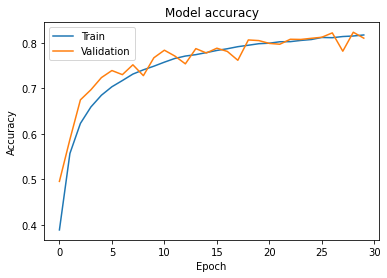

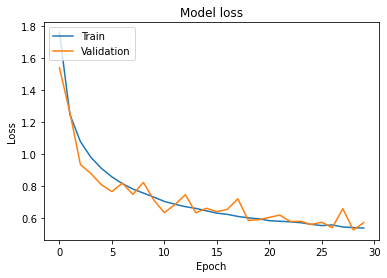

In [ ]:
# Plot training & validation accuracy values
plt.plot(history_aug.history['accuracy'])
plt.plot(history_aug.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_aug.history['loss'])
plt.plot(history_aug.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
y_test_pred = np.argmax(model.predict(X_test), axis=-1)

from sklearn import metrics
print(f"Classification report for classifier {model}:\n"
      f"{metrics.classification_report(y_test, y_test_pred)}\n")

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002111586FAF0>:
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1000
           1       0.93      0.94      0.93      1000
           2       0.72      0.75      0.73      1000
           3       0.84      0.48      0.61      1000
           4       0.82      0.70      0.75      1000
           5       0.79      0.74      0.76      1000
           6       0.58      0.95      0.72      1000
           7       0.90      0.88      0.89      1000
           8       0.92      0.91      0.91      1000
           9       0.90      0.93      0.92      1000

    accuracy                           0.81     10000
   macro avg       0.83      0.81      0.81     10000
weighted avg       0.83      0.81      0.81     10000




In [ ]:
evaluation = model.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 8s 25ms/step - loss: 0.5695 - accuracy: 0.8099
Test Accuracy : 80.99%


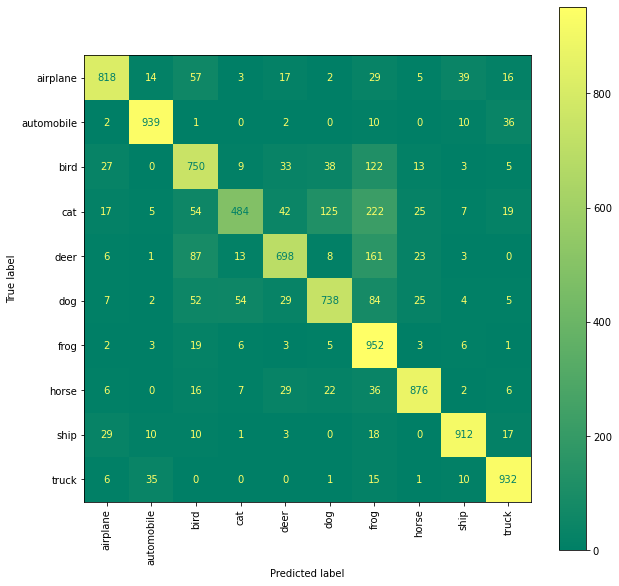

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=label_names)

fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

## 2nd Data Augmentation

In [136]:
from keras.preprocessing.image import ImageDataGenerator

data_aug2 = ImageDataGenerator(
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True)


model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
data_aug2.fit(X_train)

history_aug2 = model2.fit_generator(data_aug2.flow(X_train, y_train, batch_size=64), epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
782/782 [==============================] - 282s 360ms/step - loss: 1.7197 - accuracy: 0.4059 - val_loss: 1.4384 - val_accuracy: 0.5002
Epoch 2/30
782/782 [==============================] - 317s 405ms/step - loss: 1.1766 - accuracy: 0.5846 - val_loss: 1.0847 - val_accuracy: 0.6143
Epoch 3/30
782/782 [==============================] - 309s 395ms/step - loss: 1.0120 - accuracy: 0.6484 - val_loss: 1.1257 - val_accuracy: 0.6207
Epoch 4/30
782/782 [==============================] - 322s 412ms/step - loss: 0.9228 - accuracy: 0.6777 - val_loss: 0.8036 - val_accuracy: 0.7203
Epoch 5/30
782/782 [==============================] - 319s 408ms/step - loss: 0.8556 - accuracy: 0.7048 - val_loss: 0.8126 - val_accuracy: 0.7238
Epoch 6/30
782/782 [==============================] - 331s 424ms/step - loss: 0.8072 - accuracy: 0.7203 - val_loss: 0.6975 - val_accuracy: 0.7629
Epoch 7/30
782/782 [==============================] - 288s 368ms/step - loss: 0.7700 - accuracy: 0.7347 - val_loss: 0.7902 -

In [137]:
test_loss, test_acc = model2.evaluate(X_test, y_test, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.476838082075119
Test accuracy: 0.8392999768257141


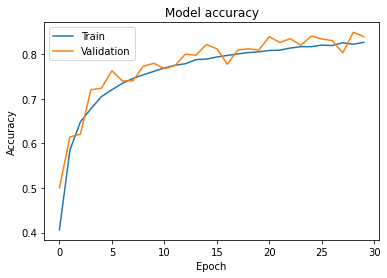

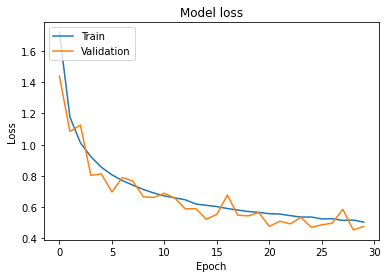

In [138]:
# Plot training & validation accuracy values
plt.plot(history_aug2.history['accuracy'])
plt.plot(history_aug2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_aug2.history['loss'])
plt.plot(history_aug2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [139]:
y_test_pred = np.argmax(model2.predict(X_test), axis=-1)

from sklearn import metrics
print(f"Classification report for classifier {model2}:\n"
      f"{metrics.classification_report(y_test, y_test_pred)}\n")

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000025B82984A00>:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1000
           1       0.91      0.96      0.93      1000
           2       0.85      0.72      0.78      1000
           3       0.68      0.73      0.70      1000
           4       0.80      0.83      0.82      1000
           5       0.87      0.68      0.77      1000
           6       0.74      0.92      0.82      1000
           7       0.93      0.84      0.89      1000
           8       0.90      0.94      0.91      1000
           9       0.89      0.92      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000




In [114]:
evaluation = model2.evaluate(X_test, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 10s 33ms/step - loss: 0.4923 - accuracy: 0.8300
Test Accuracy : 83.00%


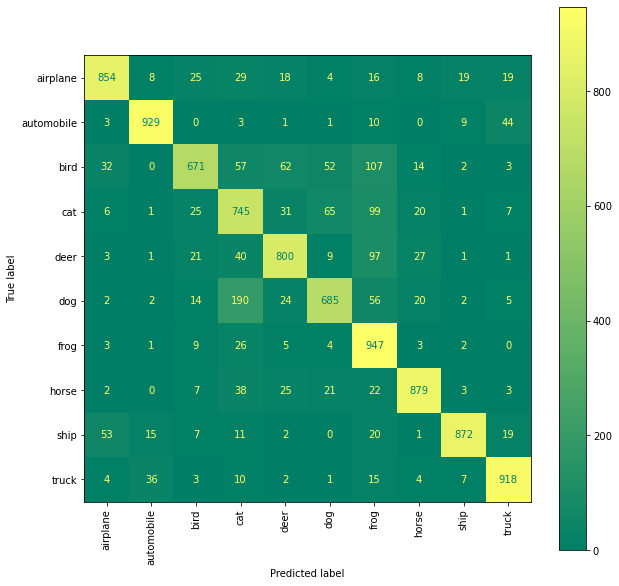

In [115]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model2.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=label_names)

fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

## Input Colour Images into CNN Model

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

meta_file = r"C:\Users\chiam\Documents\IT3312 - AITECH\Assignment\cifar-10-batches-py\batches.meta"
meta_data = unpickle(meta_file)
label_names = meta_data['label_names']

print(type(meta_data))
print("Label Names:", label_names)

file1 = r"C:\Users\chiam\Documents\IT3312 - AITECH\Assignment\cifar-10-batches-py\data_batch_1"
data_batch_1 = unpickle(file1)
trainData1 = pd.DataFrame(data_batch_1["data"])
trainLabel1 = pd.DataFrame(data_batch_1['labels'])

file2 = r"C:\Users\chiam\Documents\IT3312 - AITECH\Assignment\cifar-10-batches-py\data_batch_2"
data_batch_2 = unpickle(file2)
trainData2 = pd.DataFrame(data_batch_2["data"])
trainLabel2 = pd.DataFrame(data_batch_2['labels'])

file3 = r"C:\Users\chiam\Documents\IT3312 - AITECH\Assignment\cifar-10-batches-py\data_batch_3"
data_batch_3 = unpickle(file3)
trainData3 = pd.DataFrame(data_batch_3["data"])
trainLabel3 = pd.DataFrame(data_batch_3['labels'])

file4 = r"C:\Users\chiam\Documents\IT3312 - AITECH\Assignment\cifar-10-batches-py\data_batch_4"
data_batch_4 = unpickle(file4)
trainData4 = pd.DataFrame(data_batch_4["data"])
trainLabel4 = pd.DataFrame(data_batch_4['labels'])

file5 = r"C:\Users\chiam\Documents\IT3312 - AITECH\Assignment\cifar-10-batches-py\data_batch_5"
data_batch_5 = unpickle(file5)
trainData5 = pd.DataFrame(data_batch_5["data"])
trainLabel5 = pd.DataFrame(data_batch_5['labels'])

test_file = r"C:\Users\chiam\Documents\IT3312 - AITECH\Assignment\cifar-10-batches-py\test_batch"
test_batch_colour = unpickle(test_file)
testData = pd.DataFrame(test_batch_colour["data"])


total_colour_train_data = pd.concat([trainData1, trainData2, trainData3, trainData4, trainData5], ignore_index=True)

y_train_colour = pd.concat([trainLabel1, trainLabel2, trainLabel3, trainLabel4, trainLabel5], ignore_index=True)
y_test_colour = pd.DataFrame(test_batch_colour['labels'])


X_train_colour = total_colour_train_data.values.reshape(total_colour_train_data.values.shape[0],3, 32, 32).transpose(0,2,3,1)
X_test_colour = testData.values.reshape(testData.values.shape[0],3, 32, 32).transpose(0,2,3,1)

X_train_colour = X_train_colour.astype("float32") / 255
X_test_colour = X_test_colour.astype("float32") / 255


print("X_train shape:", X_train_colour.shape)
print(X_train_colour.shape[0], 'train samples')
print("X_test shape:", X_test_colour.shape)
print(X_test_colour.shape[0], 'test samples')


<class 'dict'>
Label Names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
X_train shape: (50000, 32, 32, 3)
50000 train samples
X_test shape: (10000, 32, 32, 3)
10000 test samples


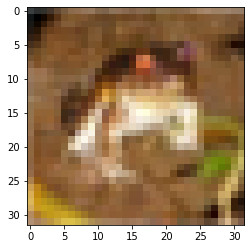

In [240]:
plt.imshow(X_train_colour[0])

## Fit the model into training colour data

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, MaxPooling2D, Conv2D, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


model=Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)       

In [12]:
batch_size = 64
epochs = 100

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [13]:
history = model.fit(X_train_colour, y_train_colour, batch_size=batch_size, epochs=epochs, validation_split=0.2,
                    callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20))

Epoch 1/100
625/625 [==============================] - 263s 420ms/step - loss: 1.6541 - accuracy: 0.4233 - val_loss: 1.5245 - val_accuracy: 0.4743
Epoch 2/100
625/625 [==============================] - 242s 388ms/step - loss: 1.1531 - accuracy: 0.5896 - val_loss: 1.0773 - val_accuracy: 0.6252
Epoch 3/100
625/625 [==============================] - 250s 400ms/step - loss: 0.9581 - accuracy: 0.6617 - val_loss: 0.8454 - val_accuracy: 0.6983
Epoch 4/100
625/625 [==============================] - 246s 394ms/step - loss: 0.8521 - accuracy: 0.7009 - val_loss: 0.7587 - val_accuracy: 0.7316
Epoch 5/100
625/625 [==============================] - 250s 401ms/step - loss: 0.7697 - accuracy: 0.7284 - val_loss: 0.7076 - val_accuracy: 0.7481
Epoch 6/100
625/625 [==============================] - 260s 416ms/step - loss: 0.7129 - accuracy: 0.7508 - val_loss: 0.7478 - val_accuracy: 0.7451
Epoch 7/100
625/625 [==============================] - 251s 402ms/step - loss: 0.6664 - accuracy: 0.7650 - val_loss: 0

In [14]:
test_loss, test_acc = model.evaluate(X_test_colour, y_test_colour, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.49960535764694214
Test accuracy: 0.8537999987602234


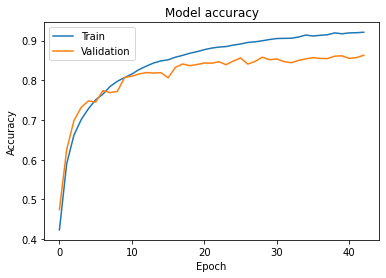

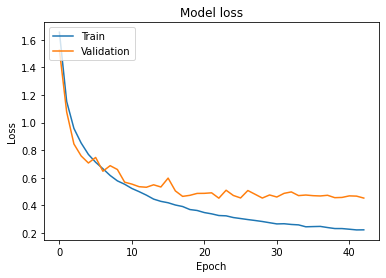

In [15]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
y_test_pred = np.argmax(model.predict(X_test_colour), axis=-1)

from sklearn import metrics
print(f"Classification report for classifier {model}:\n"
      f"{metrics.classification_report(y_test_colour, y_test_pred)}\n")

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002990DC82310>:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1000
           1       0.94      0.91      0.92      1000
           2       0.87      0.73      0.79      1000
           3       0.76      0.70      0.73      1000
           4       0.87      0.83      0.85      1000
           5       0.76      0.83      0.79      1000
           6       0.83      0.94      0.88      1000
           7       0.91      0.86      0.89      1000
           8       0.87      0.94      0.90      1000
           9       0.91      0.91      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000




In [17]:
evaluation = model.evaluate(X_test_colour, y_test_colour)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 [==============================] - 9s 30ms/step - loss: 0.4996 - accuracy: 0.8538
Test Accuracy : 85.38%


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test_colour)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test_colour, y_pred)

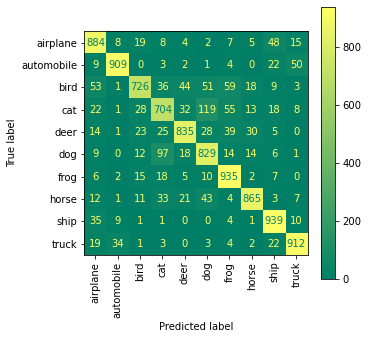

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test_colour)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test_colour, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=label_names)

fig, ax = plt.subplots(figsize=(5, 5))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

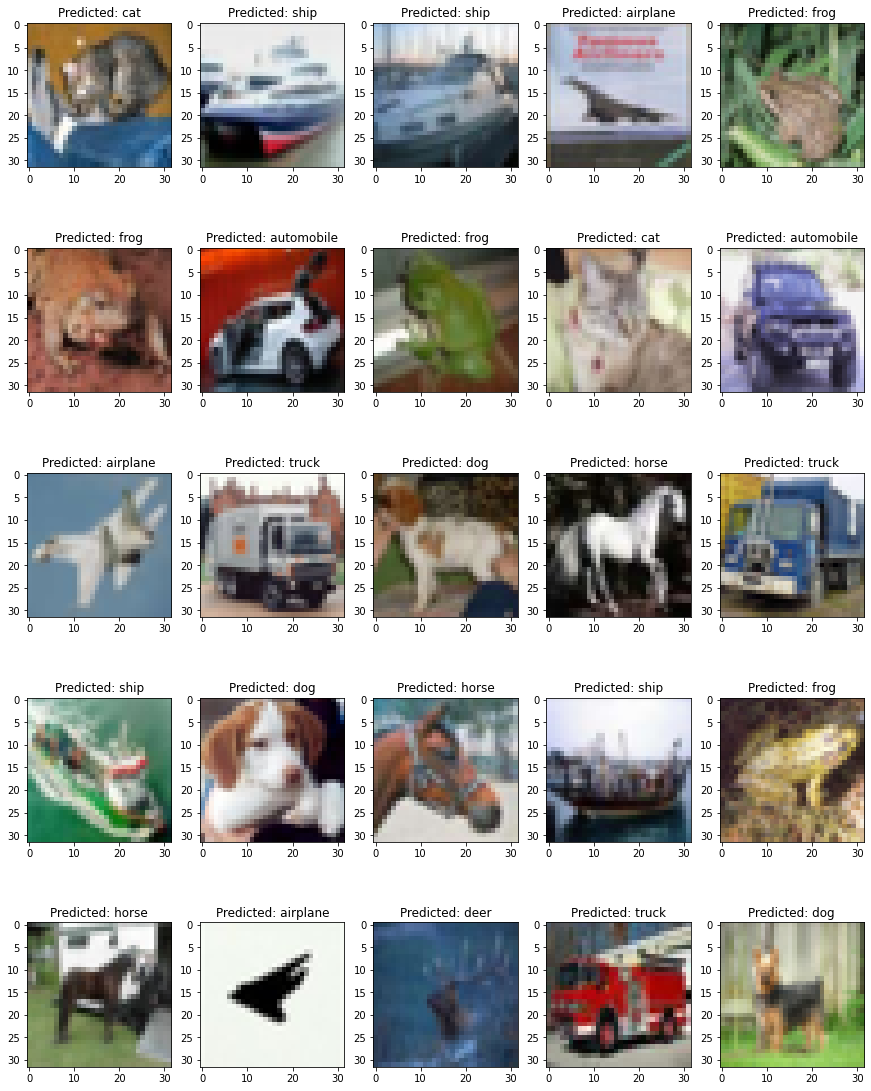

In [64]:
from keras.utils import np_utils
# Plotting the Actual vs. Predicted results
fig, axes = plt.subplots(5, 5, figsize=(15,20))
axes = axes.ravel()


for i in np.arange(0, 25):
    axes[i].imshow(X_test_colour[i])
    axes[i].set_title("Predicted: %s" % (label_names[y_pred[i]]))